# 7.1.1 Perceptron

## Introduction

The perceptron is the simplest type of artificial neural network, developed by Frank Rosenblatt in 1957. It is a linear classifier that makes its predictions based on a linear predictor function combining a set of weights with the feature vector. The perceptron algorithm updates these weights based on the error in the prediction, which helps it to learn from the data.

## Algorithm

1. **Initialization**: 
    - Initialize the weights and bias to small random numbers or zeros.
    - Choose a learning rate $\alpha$.

2. **Prediction**:
    - For each input vector $ \mathbf{x} $, compute the weighted sum:
    $$
    y = \mathbf{w} \cdot \mathbf{x} + b
    $$
    - Apply the activation function (usually a step function):
    $$
    \hat{y} = \begin{cases} 
    1 & \text{if } y \ge 0 \\
    0 & \text{if } y < 0 
    \end{cases}
    $$

3. **Update**:
    - For each misclassified sample, update the weights and bias:
    $$
    \mathbf{w} = \mathbf{w} + \alpha (y - \hat{y}) \mathbf{x}
    $$
    $$
    b = b + \alpha (y - \hat{y})
    $$

4. **Repeat**:
    - Repeat steps 2 and 3 until convergence or for a fixed number of epochs.

___
___
### Readings:
- [Perceptrons: The First Neural Network Model](https://readmedium.com/en/https:/medium.com/towards-data-science/perceptrons-the-first-neural-network-model-8b3ee4513757)
- [Perceptron Learning Algorithm: A Graphical Explanation Of Why It Works](https://towardsdatascience.com/perceptron-learning-algorithm-d5db0deab975)
- [difference between a Perceptron, Adaline, and neural network model](https://sebastianraschka.com/faq/docs/diff-perceptron-adaline-neuralnet.html)

___
___

## Applications and Limitations

**Applications**:
- Binary classification tasks such as spam detection, image recognition (with simple datasets), and sentiment analysis.
- Basis for more complex neural network architectures.

**Limitations**:
- Can only solve linearly separable problems.
- Does not perform well on complex datasets with non-linear decision boundaries.

In [1]:
import numpy as np

In [2]:
# Making the perceptron class
class Perceptron:
    def __init__(self, learning_rate=0.1, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None
    
    def activation_function(self, x):
        return np.where(x >= 0, 1, 0)
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        for _ in range(self.epochs):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_function(linear_output)
                
                update = self.learning_rate * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update
    
    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_function(linear_output)
        return y_predicted

In [3]:
import matplotlib.pyplot as plt
# Function to show the decision boundary
def plot_decision_boundary(X, y, model, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

### AND Logic with Perceptron

In [4]:
# AND logic gate data
X_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and = np.array([0, 0, 0, 1])

In [5]:
# Create perceptron models
perceptron_and = Perceptron(learning_rate=0.1, epochs=10)
# Train the models
perceptron_and.fit(X_and, y_and)

In [6]:
# Make predictions
y_pred_and = perceptron_and.predict(X_and)

In [7]:
print(f"AND logic gate predictions: {y_pred_and}")

AND logic gate predictions: [0 0 0 1]


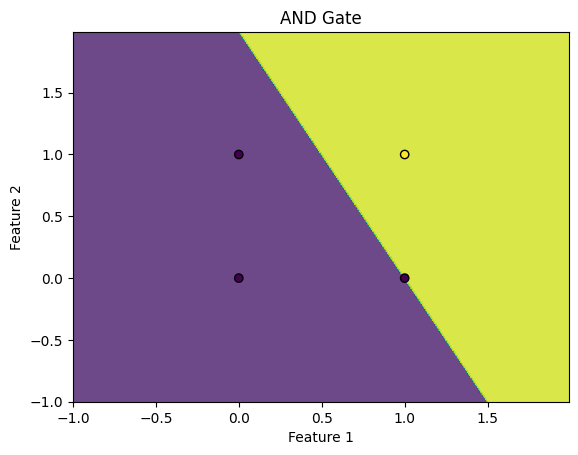

In [8]:
# Plot decision boundary for AND gate
plot_decision_boundary(X_and, y_and, perceptron_and, 'AND Gate')

### OR Logic with Perceptron

In [9]:
# OR logic gate data
X_or = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_or = np.array([0, 1, 1, 1])

In [10]:
perceptron_or = Perceptron(learning_rate=0.1, epochs=10)
perceptron_or.fit(X_or, y_or)

In [11]:
y_pred_or = perceptron_or.predict(X_or)

In [12]:
print(f"OR logic gate predictions: {y_pred_or}")

OR logic gate predictions: [0 1 1 1]


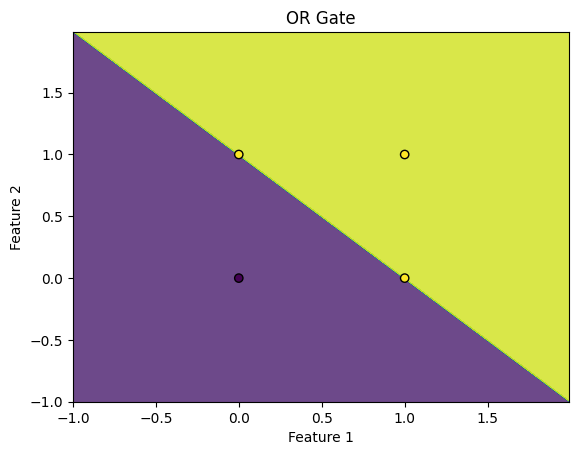

In [13]:
# Plot decision boundary for OR gate
plot_decision_boundary(X_or, y_or, perceptron_or, 'OR Gate')

### Non linear Classification: XOR logic

In [14]:
# XOR gate
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([0, 1, 1, 0])

In [15]:
perceptron_xor = Perceptron(learning_rate=0.1, epochs=10)
perceptron_xor.fit(X_xor, y_xor)

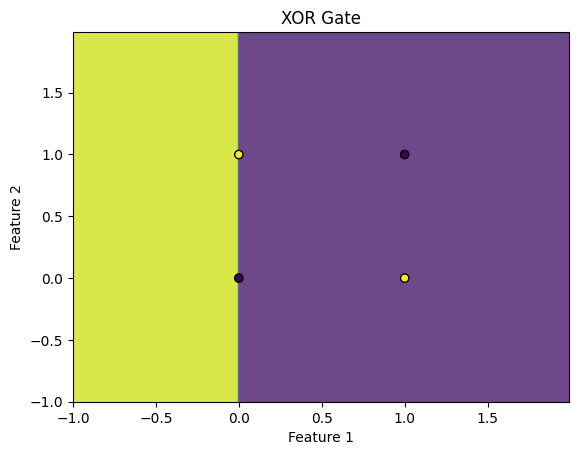

In [16]:
plot_decision_boundary(X_xor, y_xor, perceptron_xor, 'XOR Gate')

## Conclusion

The perceptron is an effective linear classifier for simple binary classification tasks where the data is linearly separable. However, it struggles with non-linearly separable problems, such as the XOR problem, due to its inability to create non-linear decision boundaries. This limitation highlights the need for more advanced models like multi-layer perceptrons (MLPs) or other neural network architectures that can handle complex data patterns.
